In [1]:
%run parse_mails2.py
%run parse_mails3.py

all_mails = parse_maildir2("../data/maildir", False)
all_mails_without_duplicates = parse_maildir2("../data/maildir", True)
sent_mails = parse_maildir3("../data/maildir", False)
sent_mails_without_duplicates = parse_maildir3("../data/maildir", True)

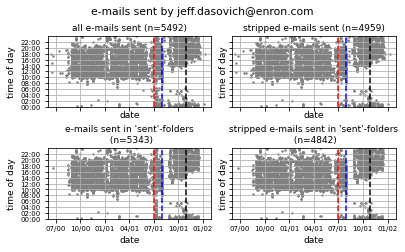

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from tueplots import bundles
import datetime as dt
import matplotlib.dates as mdates
plt.rcParams.update(bundles.neurips2021(usetex=False))

fig, axs = plt.subplots(2, 2, sharey=True, sharex=True)
fig.suptitle("e-mails sent by jeff.dasovich@enron.com")
def seconds_in_time(x, pos):
    hours = x // 3600
    minutes = (x - (hours * 3600)) // 60
    return '%s:%s' % (str(hours).zfill(2), str(minutes).zfill(2))

formatter = FuncFormatter(seconds_in_time)

all_mails_jeff = all_mails[all_mails["from"] == "jeff.dasovich@enron.com"]
axs[0][0].scatter(all_mails_jeff["date"], all_mails_jeff["seconds_since_midnight"], s=2, color="grey")
axs[0][0].grid(True)
axs[0][0].set_title(f"all e-mails sent (n={len(all_mails_jeff)})")
axs[0][0].set_xlabel("date")
axs[0][0].set_ylabel("time of day")
axs[0][0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axs[0][0].set_yticks([i * 7200 for i in range(12)])
axs[0][0].set_ylim(0, 60*60*24)
axs[0][0].set_xlim(dt.datetime(2000, 6, 1), dt.datetime(2002, 2, 1))
axs[0][0].vlines(dt.datetime(2001, 8, 1), 0, 60*60*24, color="blue", linestyles="dashed") # end of migration period
axs[0][0].vlines(dt.datetime(2001, 7, 1), 0, 60*60*24, color="red", linestyles="dashed") # begin of migration period
axs[0][0].vlines(dt.datetime(2001, 10, 28), 0, 24 * 60 * 60, color="black", linestyles="dashed") # begin of winter time in 2001
axs[0][0].yaxis.set_major_formatter(formatter)
axs[0][0].xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))

all_mails_jeff_stripped = all_mails_without_duplicates[all_mails_without_duplicates["from"] == "jeff.dasovich@enron.com"]
axs[0][1].scatter(all_mails_jeff_stripped["date"], all_mails_jeff_stripped["seconds_since_midnight"], s=2, color="grey")
axs[0][1].grid(True)
axs[0][1].set_title(f"stripped e-mails sent (n={len(all_mails_jeff_stripped)})")
axs[0][1].set_xlabel("date")
axs[0][1].set_ylabel("time of day")
axs[0][1].set_yticks([i * 7200 for i in range(12)])
axs[0][1].set_ylim(0, 60*60*24)
axs[0][1].set_xlim(dt.datetime(2000, 6, 1), dt.datetime(2002, 2, 1))
axs[0][1].vlines(dt.datetime(2001, 8, 1), 0, 60*60*24, color="blue", linestyles="dashed") # end of migration period
axs[0][1].vlines(dt.datetime(2001, 7, 1), 0, 60*60*24, color="red", linestyles="dashed") # begin of migration period
axs[0][1].vlines(dt.datetime(2001, 10, 28), 0, 24 * 60 * 60, color="black", linestyles="dashed") # begin of winter time in 2001
axs[0][1].yaxis.set_major_formatter(formatter)
axs[0][1].xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))

sent_mails_jeff = sent_mails[sent_mails["from"] == "jeff.dasovich@enron.com"]
axs[1][0].scatter(sent_mails_jeff["date"], sent_mails_jeff["seconds_since_midnight"], s=2, color="grey")
axs[1][0].grid(True)
axs[1][0].set_title(f"e-mails sent in 'sent'-folders\n (n={len(sent_mails_jeff)})")
axs[1][0].set_xlabel("date")
axs[1][0].set_ylabel("time of day")
axs[1][0].set_yticks([i * 7200 for i in range(12)])
axs[1][0].set_ylim(0, 60*60*24)
axs[1][0].set_xlim(dt.datetime(2000, 6, 1), dt.datetime(2002, 2, 1))
axs[1][0].vlines(dt.datetime(2001, 8, 1), 0, 60*60*24, color="blue", linestyles="dashed") # end of migration period
axs[1][0].vlines(dt.datetime(2001, 7, 1), 0, 60*60*24, color="red", linestyles="dashed") # begin of migration period
axs[1][0].vlines(dt.datetime(2001, 10, 28), 0, 24 * 60 * 60, color="black", linestyles="dashed") # begin of winter time in 2001
axs[1][0].yaxis.set_major_formatter(formatter)
axs[1][0].xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))

sent_mails_jeff_stripped = sent_mails_without_duplicates[sent_mails_without_duplicates["from"] == "jeff.dasovich@enron.com"]
axs[1][1].scatter(sent_mails_jeff_stripped["date"], sent_mails_jeff_stripped["seconds_since_midnight"], s=2, color="grey")
axs[1][1].grid(True)
axs[1][1].set_title(f"stripped e-mails sent in 'sent'-folders\n (n={len(sent_mails_jeff_stripped)})")
axs[1][1].set_xlabel("date")
axs[1][1].set_ylabel("time of day")
axs[1][1].set_yticks([i * 7200 for i in range(12)])
axs[1][1].set_ylim(0, 60*60*24)
axs[1][1].set_xlim(dt.datetime(2000, 6, 1), dt.datetime(2002, 2, 1))
axs[1][1].vlines(dt.datetime(2001, 8, 1), 0, 60*60*24, color="blue", linestyles="dashed") # end of migration period
axs[1][1].vlines(dt.datetime(2001, 7, 1), 0, 60*60*24, color="red", linestyles="dashed") # begin of migration period
axs[1][1].vlines(dt.datetime(2001, 10, 28), 0, 24 * 60 * 60, color="black", linestyles="dashed") # begin of winter time in 2001
axs[1][1].yaxis.set_major_formatter(formatter)
axs[1][1].xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))


plt.savefig("fig002_mail_jeff.pdf",bbox_inches="tight")
plt.show()